# Final Project for AI 221

AI 221 | 1st Sem AY 2024-2025  
Students: Jemima Bian Anila, Joshua Cantor, Michael Spencer Quinto, MEng in AI  
Instructors: Dr. Miguel Remolona | Dr. Jon Dewitt Dalisay

## Dataset

https://data.mendeley.com/datasets/tsvdyhbphs/1

https://www.kaggle.com/datasets/jaydepaolomirandilla/philippine-medicinal-plant-leaf-dataset/data


In [4]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import torch  
import cv2
import random



%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [6]:
print(torch.cuda.is_available())

True


# Import utility modules from `src` folder

Note: all reusable code like transformations for the dataframes, etc. can be found inside the `src` folder and are imported here for better modularity and version control


In [9]:
from src.utils_data import (
    PROCESSED_DATA_FOLDER,
    HIBISCUS_PROCESSED_FOLDER,
    AVERRHOEA_BILIMBI_PROCESSED_FOLDER,
    BG_REMOVED_DATA_FOLDER,
)

In [10]:
print(PROCESSED_DATA_FOLDER.relative_to(project_root))
print(HIBISCUS_PROCESSED_FOLDER.relative_to(project_root))

data/ph_med_plants_reduced_sizes
data/ph_med_plants_reduced_sizes/1Hibiscus rosa-sinensis(HRS)


# 1. Exploratory Data Analysis


## 1.1 Data Loading and Inspection


In [7]:
# Get list of files in HIBISCUS_PROCESSED_FOLDER
hibiscus_files = list(HIBISCUS_PROCESSED_FOLDER.glob("*.webp"))
hibiscus_files_names = [file.name for file in hibiscus_files]
print(hibiscus_files_names)

['Class1_19.webp', 'Class1_93.webp', 'Class1_3.webp', 'Class1_37.webp', 'Class1_80.webp', 'Class1_17.webp', 'Class1_23.webp', 'Class1_22.webp', 'Class1_25.webp', 'Class1_39.webp', 'Class1_33.webp', 'Class1_95.webp', 'Class1_16.webp', 'Class1_115.webp', 'Class1_49.webp', 'Class1_32.webp', 'Class1_110.webp', 'Class1_108.webp', 'Class1_84.webp', 'Class1_111.webp', 'Class1_116.webp', 'Class1_7.webp', 'Class1_77.webp', 'Class1_69.webp', 'Class1_73.webp', 'Class1_89.webp', 'Class1_63.webp', 'Class1_58.webp', 'Class1_105.webp', 'Class1_18.webp', 'Class1_75.webp', 'Class1_106.webp', 'Class1_112.webp', 'Class1_27.webp', 'Class1_11.webp', 'Class1_52.webp', 'Class1_34.webp', 'Class1_104.webp', 'Class1_35.webp', 'Class1_65.webp', 'Class1_102.webp', 'Class1_76.webp', 'Class1_97.webp', 'Class1_44.webp', 'Class1_72.webp', 'Class1_1.webp', 'Class1_42.webp', 'Class1_38.webp', 'Class1_28.webp', 'Class1_6.webp', 'Class1_30.webp', 'Class1_62.webp', 'Class1_81.webp', 'Class1_96.webp', 'Class1_114.webp', 'C

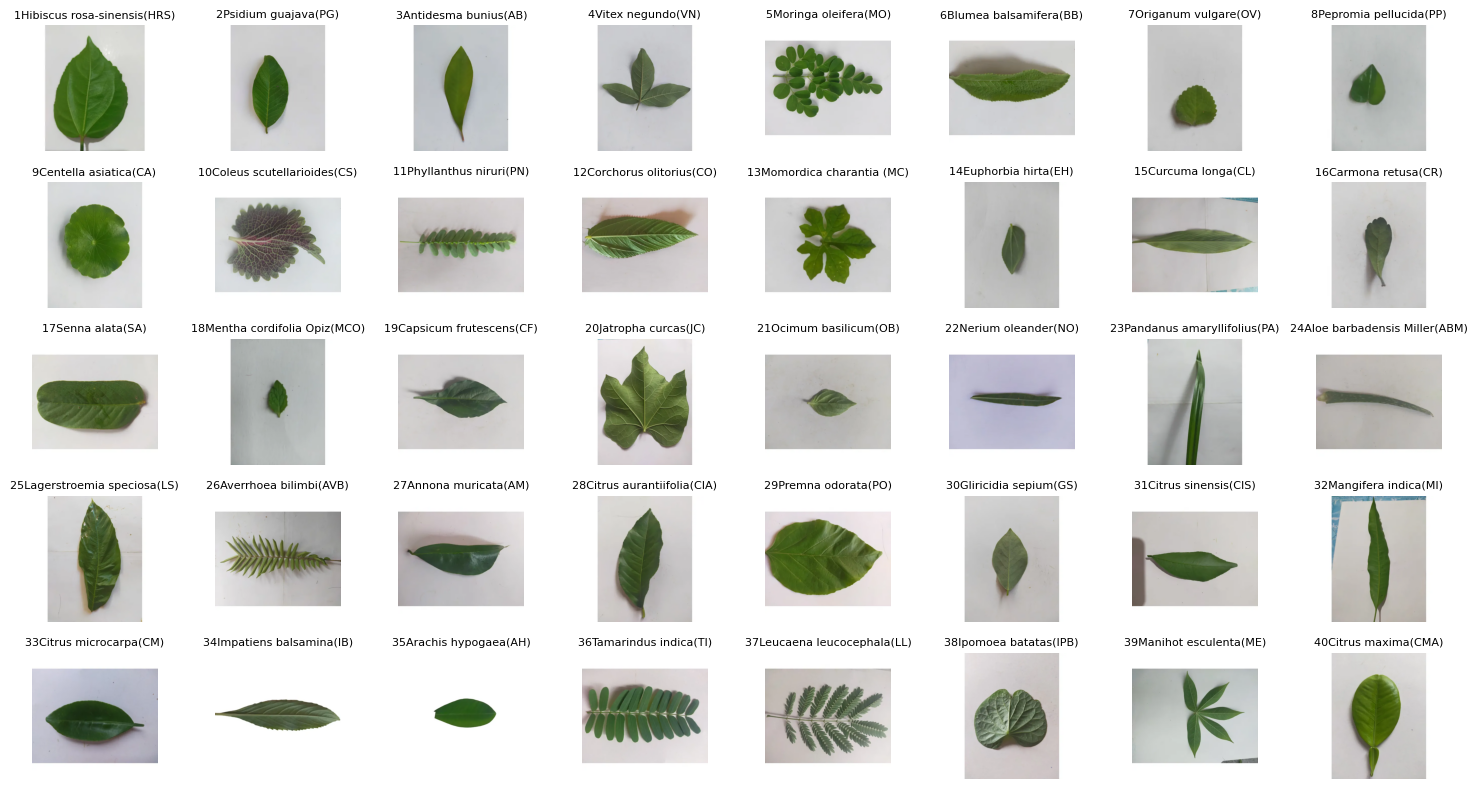

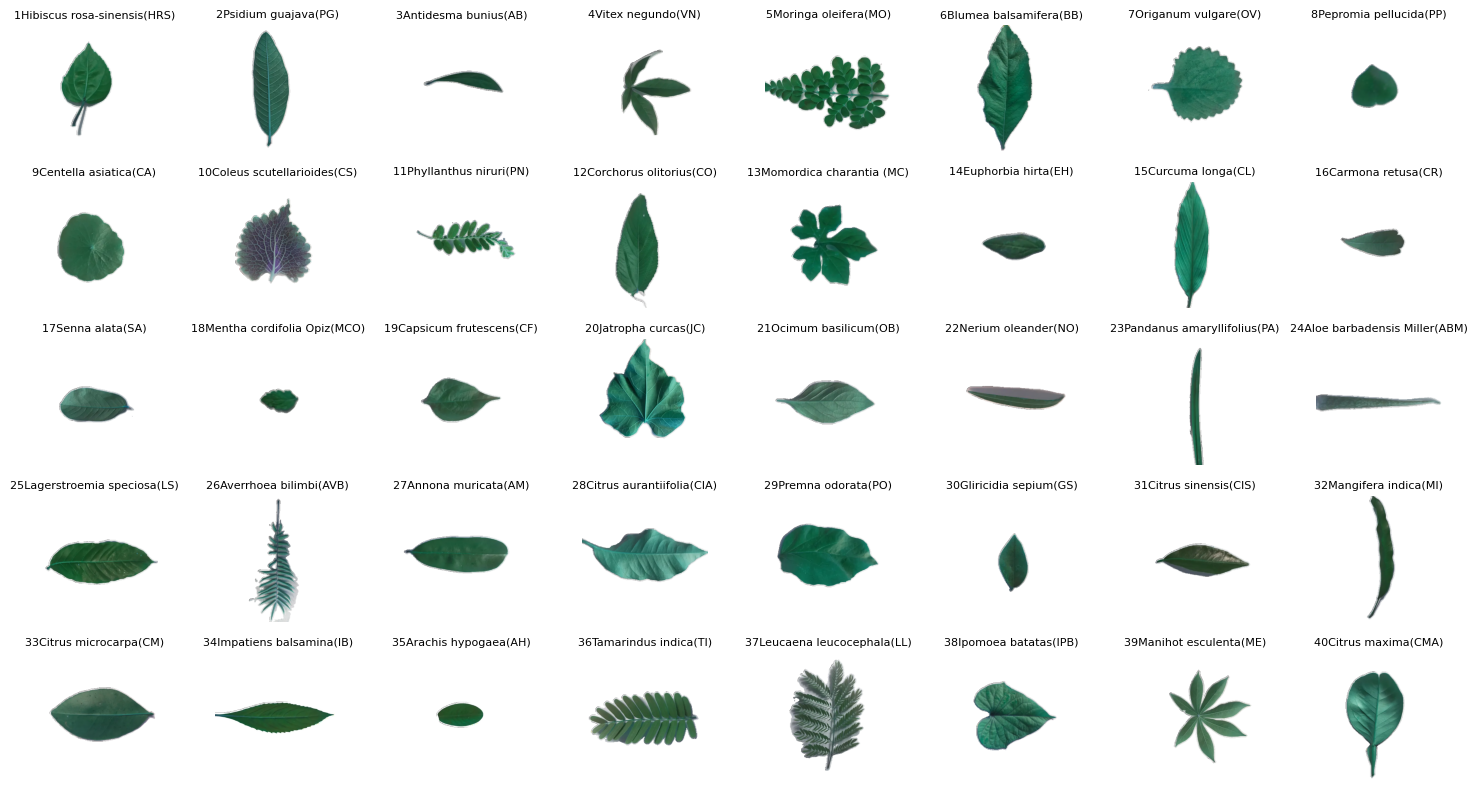

In [13]:
from src.utils_data import (
    plot_random_raw_images_grid,
    class_folders,
    removed_bg_class_folders,
    get_random_images_from_each_class,
    RAW_DATA_DF,
    REMOVED_BG_DATA_DF,
)


# get 1 random image from each class folder (40 images in total)
plot_random_raw_images_grid(class_folders)
plot_random_raw_images_grid(removed_bg_class_folders)

## Visualizing Preprocessing


In [ ]:
# List of the paths of the 40 random images
random_images_40 = get_random_images_from_each_class(class_folders)
random_images_10 = random_images_40[:10]

In [ ]:
from src.utils_preprocessing import preprocess_leaf_image
from src.utils_plotting import plot_5x8_grid, plot_images_side_by_side

# Testing Feature Extraction


In [ ]:
from src.utils_preprocessing import (
    extract_texture_features,
    extract_shape_features,
    extract_color_features,
    extract_vein_features,
    extract_all_features,
    create_feature_dataset,
)

In [ ]:
from src.utils_preprocessing import extract_shape_features
from src.utils_plotting import plot_images_with_features


# random_image_10_sample = random_images_10[0]
# random_image_10_sample = plt.imread(random_image_10_sample)
# print(random_image_10_sample.shape)

# # Note: extract_shape_features() expects a numpy array with the removed background (i.e. RGBA format, i.e. 4 channels with an alpha channel)
# # Extract shape features from 10 random images
# shape_features = [
#     # extract_shape_features(preprocess_leaf_image(plt.imread(img)))
#     extract_shape_features(plt.imread(img))
#     for img in random_images_10
# ]

shape_features_on_bg_removed_images = [
    extract_shape_features(img) for img in bg_removed_images_10
]

# plot_images_with_features(random_images_10, shape_features)
plot_images_with_features(random_images_10, shape_features_on_bg_removed_images)

# Extracting all features


In [28]:
from src.utils_preprocessing import extract_all_features, create_feature_dataset

# Test extracting all features from a single image
all_features = extract_all_features(random_images_10[0])
display(all_features)
display(len(all_features))

# Test extracting features on random 10 images

{'rgb_0_mean': 190.526508,
 'rgb_0_std': 69.43450549493339,
 'rgb_0_skewness': -1.2895173543377707,
 'rgb_1_mean': 199.954432,
 'rgb_1_std': 52.254885126248034,
 'rgb_1_skewness': -1.0589947858926578,
 'rgb_2_mean': 181.532452,
 'rgb_2_std': 81.85991279538294,
 'rgb_2_skewness': -1.3249418167748412,
 'hsv_0_mean': 29.52742,
 'hsv_0_std': 17.566010592721387,
 'hsv_0_skewness': -0.5664243666561218,
 'hsv_1_mean': 42.720408,
 'hsv_1_std': 81.81795727292106,
 'hsv_1_skewness': 1.7878877468184629,
 'hsv_2_mean': 200.0152,
 'hsv_2_std': 52.20706918569553,
 'hsv_2_skewness': -1.0603415202660462,
 'lab_0_mean': 201.794044,
 'lab_0_std': 53.93726253830522,
 'lab_0_skewness': -1.1825990450913637,
 'lab_1_mean': 121.65834,
 'lab_1_std': 11.968756010730605,
 'lab_1_skewness': -1.7304529825893828,
 'lab_2_mean': 136.3241,
 'lab_2_std': 14.397149828698737,
 'lab_2_skewness': 1.6976113641160064,
 'rgb_0_hist_0': 0.0,
 'rgb_0_hist_1': 2.8000000384054147e-05,
 'rgb_0_hist_2': 0.000623999978415668,
 'rg

371